In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting 
%matplotlib inline

df = pd.read_csv("onlinesales.csv")
# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())
# Check structure
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# Fill or drop missing values
df = df.dropna()

First 5 rows of the dataset:


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
None

Missing values per column:
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [13]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())
if "Product Category" in df.columns:
    group_mean = df.groupby("Product Category")["Total Revenue"].mean()
    print("\nAverage Value per Product Category:")
    print(group_mean)


Summary Statistics:


,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000



Average Value per Product Category:
Product Category
Beauty Products     65.54750
Books               46.54825
Clothing           203.22325
Electronics        874.56025
Home Appliances    466.15400
Sports             358.16300
Name: Total Revenue, dtype: float64


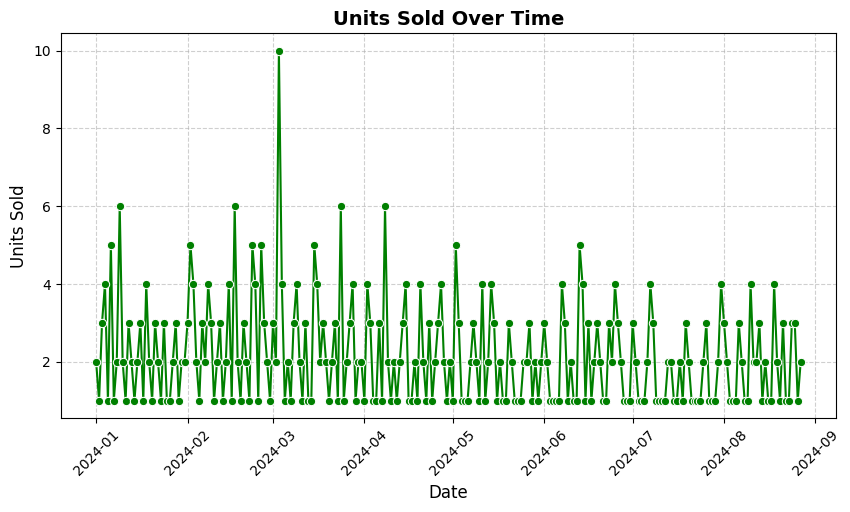

In [19]:
import seaborn as sns

# Ensure datetime
df["Date"] = pd.to_datetime(df["Date"])

# Plot with seaborn
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Date", y="Units Sold", marker="o", color="green")

# Customize
plt.title("Units Sold Over Time", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


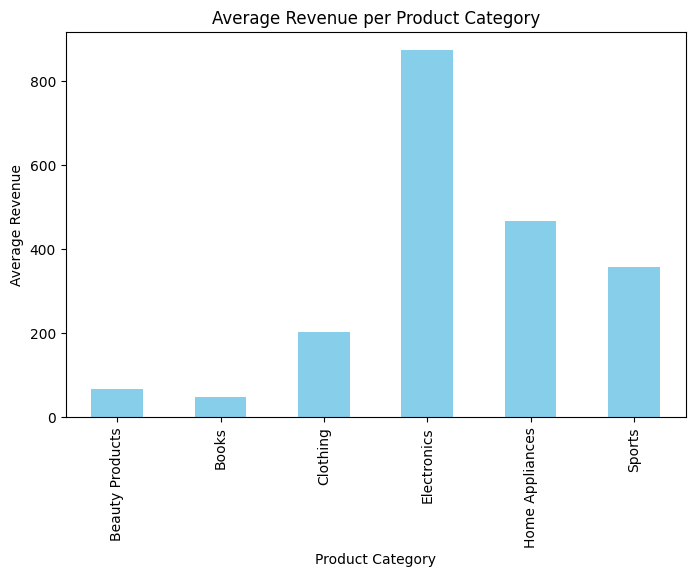

In [16]:
if "Product Category" in df.columns and "Total Revenue" in df.columns:
    group_mean.plot(kind="bar", color="skyblue", figsize=(8,5), title="Average Revenue per Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Average Revenue")
    plt.show()

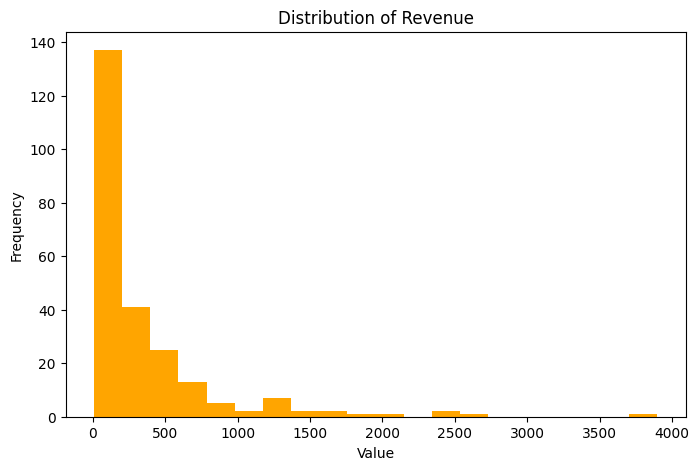

In [17]:
if "Total Revenue" in df.columns:
    df["Total Revenue"].plot(kind="hist", bins=20, color="orange", figsize=(8,5), title="Distribution of Revenue")
    plt.xlabel("Value")
    plt.show()

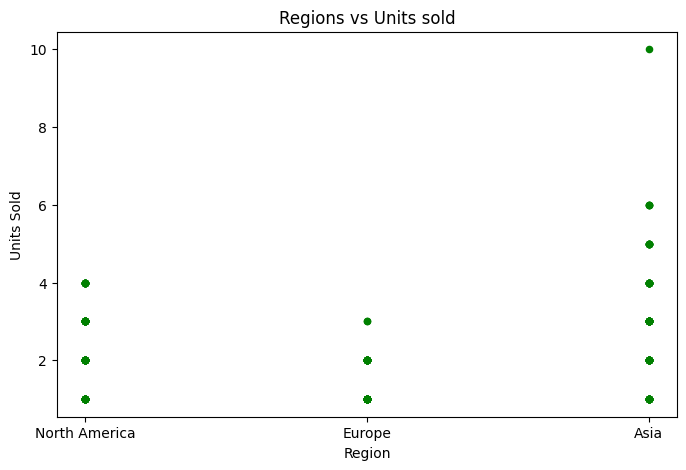

In [20]:
# 4. Scatter plot 
if "Region" in df.columns and "Units Sold" in df.columns:
    df.plot(kind="scatter", x="Region", y="Units Sold", color="green", figsize=(8,5), title="Regions vs Units sold")
    plt.xlabel("Region")
    plt.ylabel("Units Sold")
    plt.show()

## 📝 Findings & Observations

- **Trends over time**  
  Units sold were almost constant in the first 4 months with a peak in March, followed by a slight dip in May–December.  

- **Differences across categories**  
  - **Electronics** consistently outperformed other categories in terms of average sales.  
  - **Books** had the lowest average sales among all product groups.  

- **Distribution insights**  
  - The histogram of `Units sold` shows a left-skewed distribution, meaning most unit sold are large numbers, but a few very same numbers pull the average downward.

- **Correlations between variables**  
  - Scatter plot of `Regions` vs `Units Sold` Asia has the highest sales, followed by North America then Europe.  

- **General insight**  
  This analysis suggests that focusing on electronics and addressing the seasonal dip could improve overall revenue performance.
